In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2},inplace=True)

In [26]:
x=data.iloc[:,1:3].values
x.shape

(150, 2)

In [27]:
y=data.iloc[:,-1].values
y.shape

(150,)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [29]:
x_train.shape

(120, 2)

In [30]:
x_test.shape

(30, 2)

In [31]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()

In [32]:
#x_train=scaler.fit_transform(x_train)
#x_train

In [33]:
#x_test=scaler.transform(x_test)
#x_test

In [34]:
# 1st method to find k
np.sqrt(x_train.shape[0])

10.954451150103322

In [35]:
k=10

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [38]:
y_pred=knn.predict(x_test)

In [39]:
y_pred.shape

(30,)

In [40]:
y_test.shape

(30,)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6, 5, 0],
       [4, 6, 0],
       [0, 0, 9]], dtype=int64)

In [43]:
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))

In [44]:
len(accuracy)

25

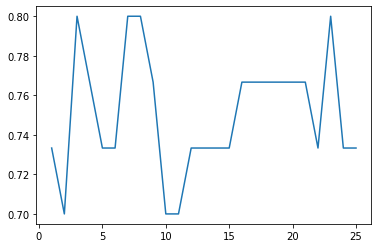

In [45]:
plt.plot(range(1,26),accuracy)

In [370]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [371]:
y_pred=knn.predict(x_test)

# ACCURACY

In [372]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [373]:
def pred_output():
    sl=float(input("Enter the Sepal Length in cm "))
    sw=float(input("Enter the Sepal Width in cm "))
    new=np.array([[sl],[sw]]).reshape(1,2)
    
    if knn.predict(new)[0]=='Iris-setosa':
        return "The species is-Iris-setosa"
    elif knn.predict(new)[0]=='Iris-versicolor':
        return "The species is-Iris-versicolor"
    else:
        return "The species is-Iris-virginica"

In [374]:
pred_output()

Enter the Sepal Length in cm 6.3
Enter the Sepal Width in cm 2


'The species is-Iris-virginica'

# MESHGRID

In [375]:
#Creating Meshgrid
xaxis=np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01)
yaxis=np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01)

xx,yy=np.meshgrid(xaxis,yaxis)

In [376]:
xx.shape

(440, 550)

In [377]:
yy.shape

(440, 550)

In [378]:
in_array=np.array([xx.ravel(),yy.ravel()]).T
#in_array.shape
labels=knn.predict(in_array)

In [379]:
labels.shape

(242000,)

Text(0.5, 1.0, 'Decision Boundary of KNN classifier (IRIS DATASET)')

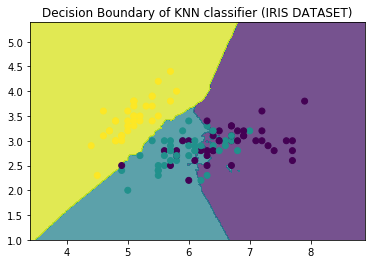

In [383]:
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.75)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.title('Decision Boundary of KNN classifier (IRIS DATASET)')